In [4]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [5]:
width = 800
height = 800

Tarea 1. Tablero de ajedrez 800x800

(800, 800, 1)


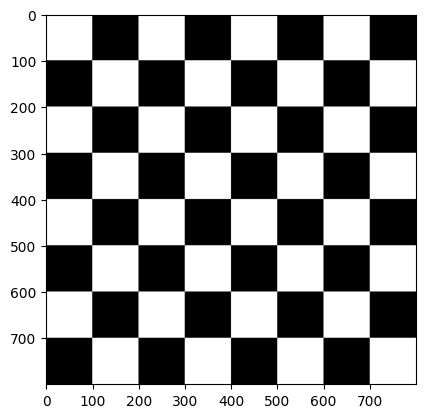

In [6]:
chess_board = np.zeros((width,height,1), dtype = np.uint8)
print(chess_board.shape)

square_size = 100

for i in range(0, height, square_size):
    for j in range(0, width, square_size):
        if (i // square_size + j // square_size) % 2 == 0:
            chess_board[i:i+square_size, j:j+square_size] = 255

cv2.imshow('Image', chess_board)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(chess_board, cmap='gray')
plt.show()